In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

%matplotlib inline
import mahotas as mt

In [2]:
test_img_path = "/home/kunal/Desktop/Programing VS Code/Codes/minorProject2/valid/Potato___Late_blight/0e068694-63b7-4edf-a93d-f2e9f28efaa6___RS_LB 3923.JPG"

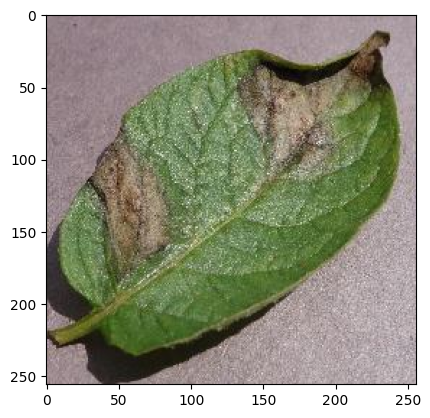

In [3]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

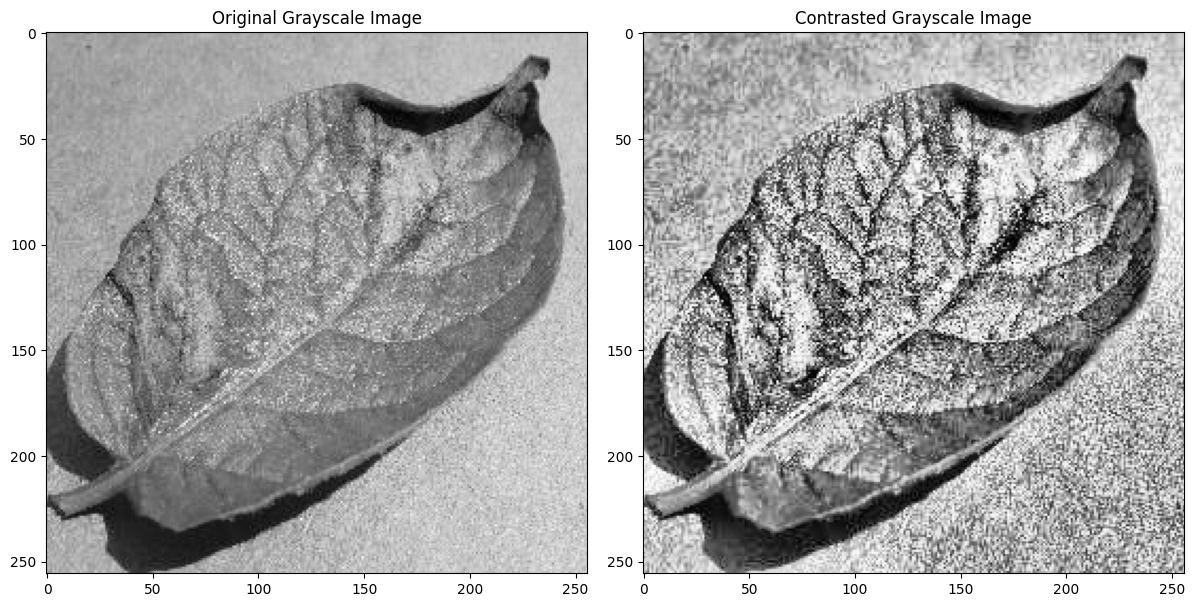

In [4]:
# gray image conversion
gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = exposure.equalize_adapthist(
    gs, kernel_size=None, clip_limit=0.015, nbins=256)

# Convert the float64 image to 8-bit
clahe_uint8 = (clahe * 255).astype(np.uint8)

# Display the original and enhanced images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(gs, cmap="Greys_r")
plt.title("Original Grayscale Image")

# Adjusting contrast in the enhanced image
contrasted_image = np.clip(clahe_uint8, 0, 255)
plt.subplot(1, 3, 2)
plt.imshow(contrasted_image, cmap="Greys_r")
plt.title("Contrasted Grayscale Image")

plt.tight_layout()
plt.show()

In [5]:
contrasted_image.shape

(256, 256)

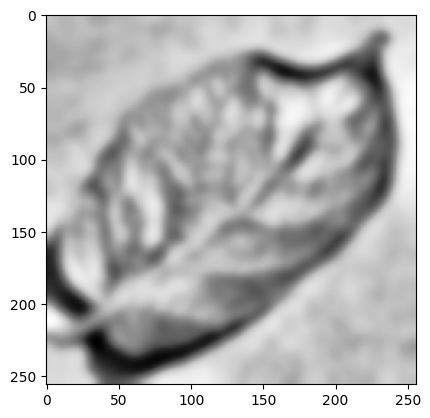

In [6]:
blur = cv2.GaussianBlur(contrasted_image, (25, 25), 0)
plt.imshow(blur, cmap='Greys_r')

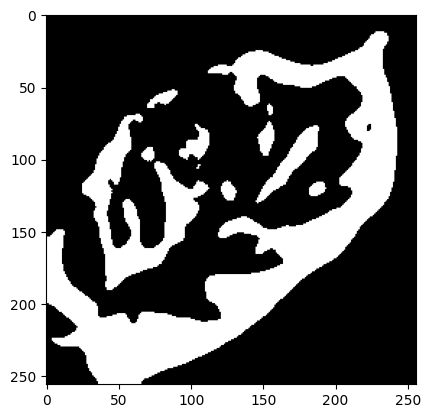

In [7]:
ret_otsu, im_bw_otsu = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu, cmap='Greys_r')

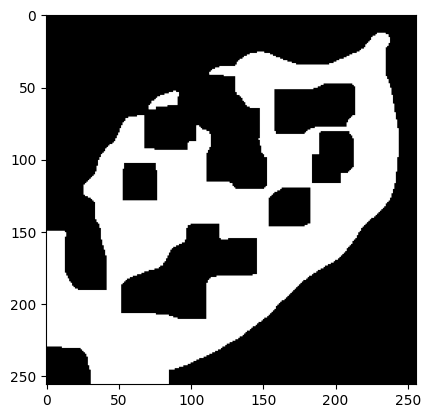

In [8]:
kernel = np.ones((20, 20), np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='Greys_r')

Color based features

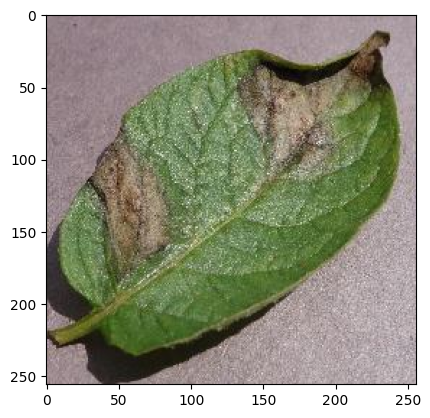

In [9]:
plt.imshow(img, cmap="Greys_r")

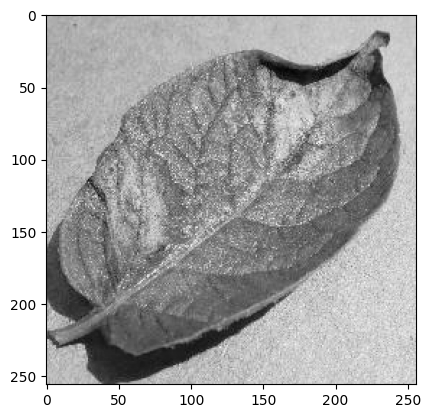

In [10]:
red_channel = img[:, :, 0]
plt.imshow(red_channel, cmap="Greys_r")

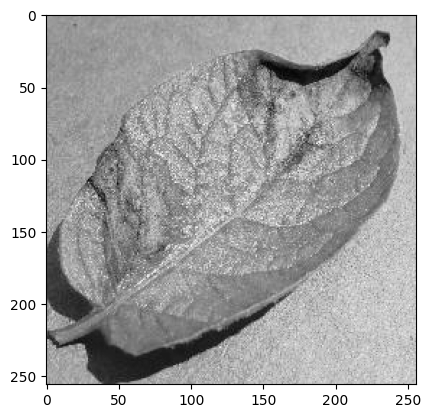

In [11]:
green_channel = img[:, :, 1]
plt.imshow(green_channel, cmap="Greys_r")

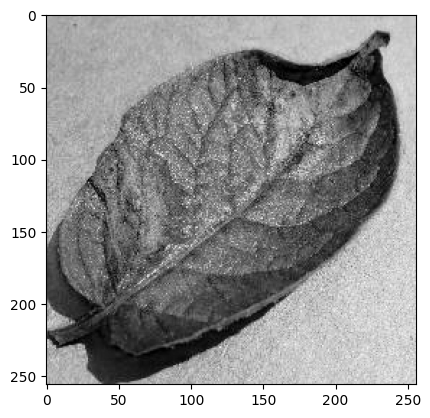

In [12]:
blue_channel = img[:, :, 2]
plt.imshow(blue_channel, cmap="Greys_r")

In [13]:
np.mean(blue_channel)

106.84602355957031

In [14]:
np.mean(red_channel)

128.3800506591797

In [15]:
np.mean(green_channel)

129.03973388671875

In [16]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [17]:
red_mean = np.mean(red_channel)
red_mean

128.36837768554688

In [18]:
green_mean = np.mean(green_channel)
green_mean

128.98526000976562

In [19]:
blue_mean = np.mean(blue_channel)
blue_mean

106.84602355957031

In [20]:
red_var = np.std(red_channel)
red_var

43.022754526083645

In [21]:
# 3. Texture based features
# Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [22]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 1.65296696e-04,  5.63104454e+02,  8.11280644e-01,  1.49188752e+03,
        9.99148220e-02,  2.52343018e+02,  5.40444562e+03,  8.09603026e+00,
        1.32944445e+01,  1.10677672e-04,  5.48323052e+00, -1.55154144e-01,
        9.44668566e-01])

In [23]:
print(ht_mean[1])  # contrast
print(ht_mean[2])  # correlation
print(ht_mean[4])  # inverse difference moments
print(ht_mean[8])  # entropy

563.1044541912961
0.8112806435199477
0.09991482202113323
13.294444471287104
